In [23]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [24]:
hists={}
for filename in os.listdir('hists'):
    print(filename)
    with gzip.open('hists/'+filename) as fin:
        print(fin)
        hists.update(pickle.load(fin))

print(hists['recoil'])

ZJetsToNuNu_HT-100To200_13TeV-madgraph.pkl.gz
<gzip _io.BufferedReader name='hists/ZJetsToNuNu_HT-100To200_13TeV-madgraph.pkl.gz' 0x129a35668>
ZJetsToNuNu_HT-600To800_13TeV-madgraph.pkl.gz
<gzip _io.BufferedReader name='hists/ZJetsToNuNu_HT-600To800_13TeV-madgraph.pkl.gz' 0x129bd0198>
ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph.pkl.gz
<gzip _io.BufferedReader name='hists/ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph.pkl.gz' 0x12897ef28>
ZJetsToNuNu_HT-1200To2500_13TeV-madgraph.pkl.gz
<gzip _io.BufferedReader name='hists/ZJetsToNuNu_HT-1200To2500_13TeV-madgraph.pkl.gz' 0x129a322e8>
ZJetsToNuNu_HT-400To600_13TeV-madgraph.pkl.gz
<gzip _io.BufferedReader name='hists/ZJetsToNuNu_HT-400To600_13TeV-madgraph.pkl.gz' 0x129a14da0>
ZJetsToNuNu_HT-800To1200_13TeV-madgraph.pkl.gz
<gzip _io.BufferedReader name='hists/ZJetsToNuNu_HT-800To1200_13TeV-madgraph.pkl.gz' 0x129a14a90>
ZJetsToNuNu_HT-200To400_13TeV-madgraph.pkl.gz
<gzip _io.BufferedReader name='hists/ZJetsToNuNu_HT-200To400_13TeV-madgraph.pkl.gz' 0x12

In [25]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset")
process_map = OrderedDict()
#process_map["Hcc"] = ("GluGluHToCC", 2)
#process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Z+jets"] = "ZJets*"
#process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
#process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
#process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
#process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
#process_map["Top"] = ("TTTo*", slice(None))
#process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)

print(hists['recoil'].values(sumw2=True))
print(hists['recoil'].identifiers("process"))

{('Z+jets',): (array([562766.4714879 ,  14548.55161948, 116950.21986117,   1579.80101769,
       111015.29171365,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ]), array([1264664.35899859,   32693.90704739,  262813.76437447,
          3550.1724829 ,  249476.62991167,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ]))}
['Z+jets']


KeyError: ()

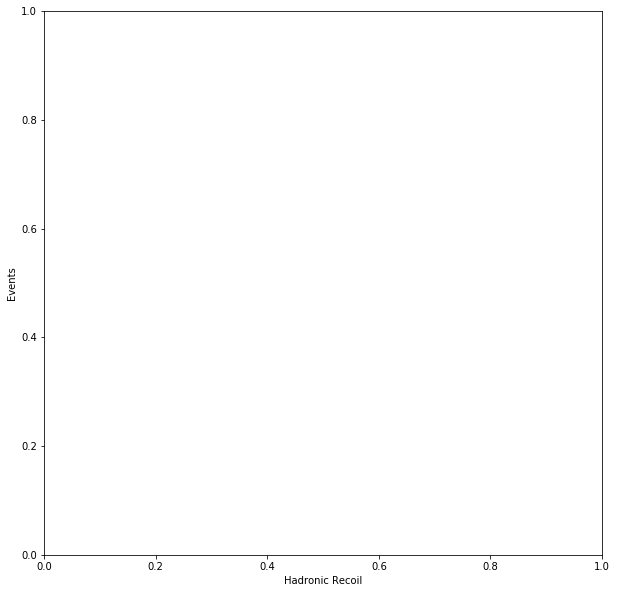

In [17]:
from cycler import cycler

%matplotlib inline
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_prop_cycle(cycler(color=colors))
plot.plot1d(hists['recoil'], ax=ax, overlay="process", clear=False, stack=True, line_opts=None, fill_opts=fill_opts, error_opts=error_opts)

ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)
#leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

In [10]:
nbins = sum(sum(arr.size for arr in h._sumw.values()) for h in hists.values())
nfilled = sum(sum(np.sum(arr>0) for arr in h._sumw.values()) for h in hists.values())
print("Now %.1fM bins" % (nbins/1e6, ))
print("Nonzero bins: %.1f%%" % (100*nfilled/nbins, ))

Now 0.0M bins
Nonzero bins: 4.2%
